In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('Train_data.csv')
variable_desc = pd.read_csv('Variable Description.csv')

# Display the first few rows and info of the training data
print("Train Data Head:")
print(train_df.head())
print("\nTrain Data Info:")
print(train_df.info())

# Display the variable description
print("\nVariable Description:")
print(variable_desc)

Train Data Head:
  Customer Id  YearOfObservation  Insured_Period  Residential  \
0      H14663               2013             1.0            0   
1       H2037               2015             1.0            0   
2       H3802               2014             1.0            0   
3       H3834               2013             1.0            0   
4       H5053               2014             1.0            0   

  Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                N               V      V          U               290.0   
1                V               N      O          R               490.0   
2                N               V      V          U               595.0   
3                V               V      V          U              2840.0   
4                V               N      O          R               680.0   

   Building_Type  Date_of_Occupancy NumberOfWindows Geo_Code  Claim  
0              1             1960.0               .     1053     

In [2]:
# Inspect unique values for object columns
print("Unique values in NumberOfWindows:")
print(train_df['NumberOfWindows'].unique())

print("\nUnique values in Garden:")
print(train_df['Garden'].unique())

print("\nMissing values count:")
print(train_df.isnull().sum())

# Clean NumberOfWindows
# It looks like "   ." represents missing.
# Also notice numbers are strings.
# '>=10' is also a value? Let's check.
pass

Unique values in NumberOfWindows:
['   .' '4' '3' '2' '5' '>=10' '6' '7' '9' '8' '1']

Unique values in Garden:
['V' 'O' nan]

Missing values count:
Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64


In [3]:
import numpy as np

# 1. Cleaning NumberOfWindows
# Replace '   .' with NaN and '>=10' with 10
train_df['NumberOfWindows'] = train_df['NumberOfWindows'].replace('   .', np.nan)
train_df['NumberOfWindows'] = train_df['NumberOfWindows'].replace('>=10', 10)
# Convert to float
train_df['NumberOfWindows'] = train_df['NumberOfWindows'].astype(float)

# 2. Imputing Missing Values

# Garden: Fill with mode (most frequent)
garden_mode = train_df['Garden'].mode()[0]
train_df['Garden'] = train_df['Garden'].fillna(garden_mode)

# Building Dimension: Fill with median
dim_median = train_df['Building Dimension'].median()
train_df['Building Dimension'] = train_df['Building Dimension'].fillna(dim_median)

# Date_of_Occupancy: Fill with median
occ_median = train_df['Date_of_Occupancy'].median()
train_df['Date_of_Occupancy'] = train_df['Date_of_Occupancy'].fillna(occ_median)

# NumberOfWindows: Fill NaN with median
win_median = train_df['NumberOfWindows'].median()
train_df['NumberOfWindows'] = train_df['NumberOfWindows'].fillna(win_median)

# Geo_Code: Fill with mode (or 'Unknown' if preferred, but mode is safer for some models)
geo_mode = train_df['Geo_Code'].mode()[0]
train_df['Geo_Code'] = train_df['Geo_Code'].fillna(geo_mode)


# 3. Feature Engineering: Building Age
# Age = YearOfObservation - Date_of_Occupancy
# Handle cases where Age might be negative (data entry errors)
train_df['Building_Age'] = train_df['YearOfObservation'] - train_df['Date_of_Occupancy']
train_df.loc[train_df['Building_Age'] < 0, 'Building_Age'] = 0 # Fix negative age

# Check if any missing values remain
print("Remaining missing values:")
print(train_df.isnull().sum())
print("\nUnique values in Garden after filling:")
print(train_df['Garden'].unique())

Remaining missing values:
Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
Building_Age          0
dtype: int64

Unique values in Garden after filling:
['V' 'O']


Geo_Code unique values count: 1307


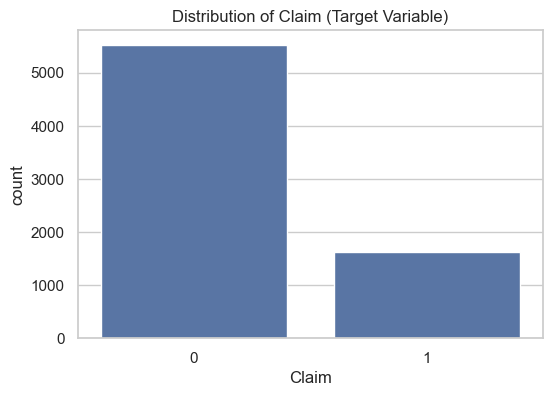

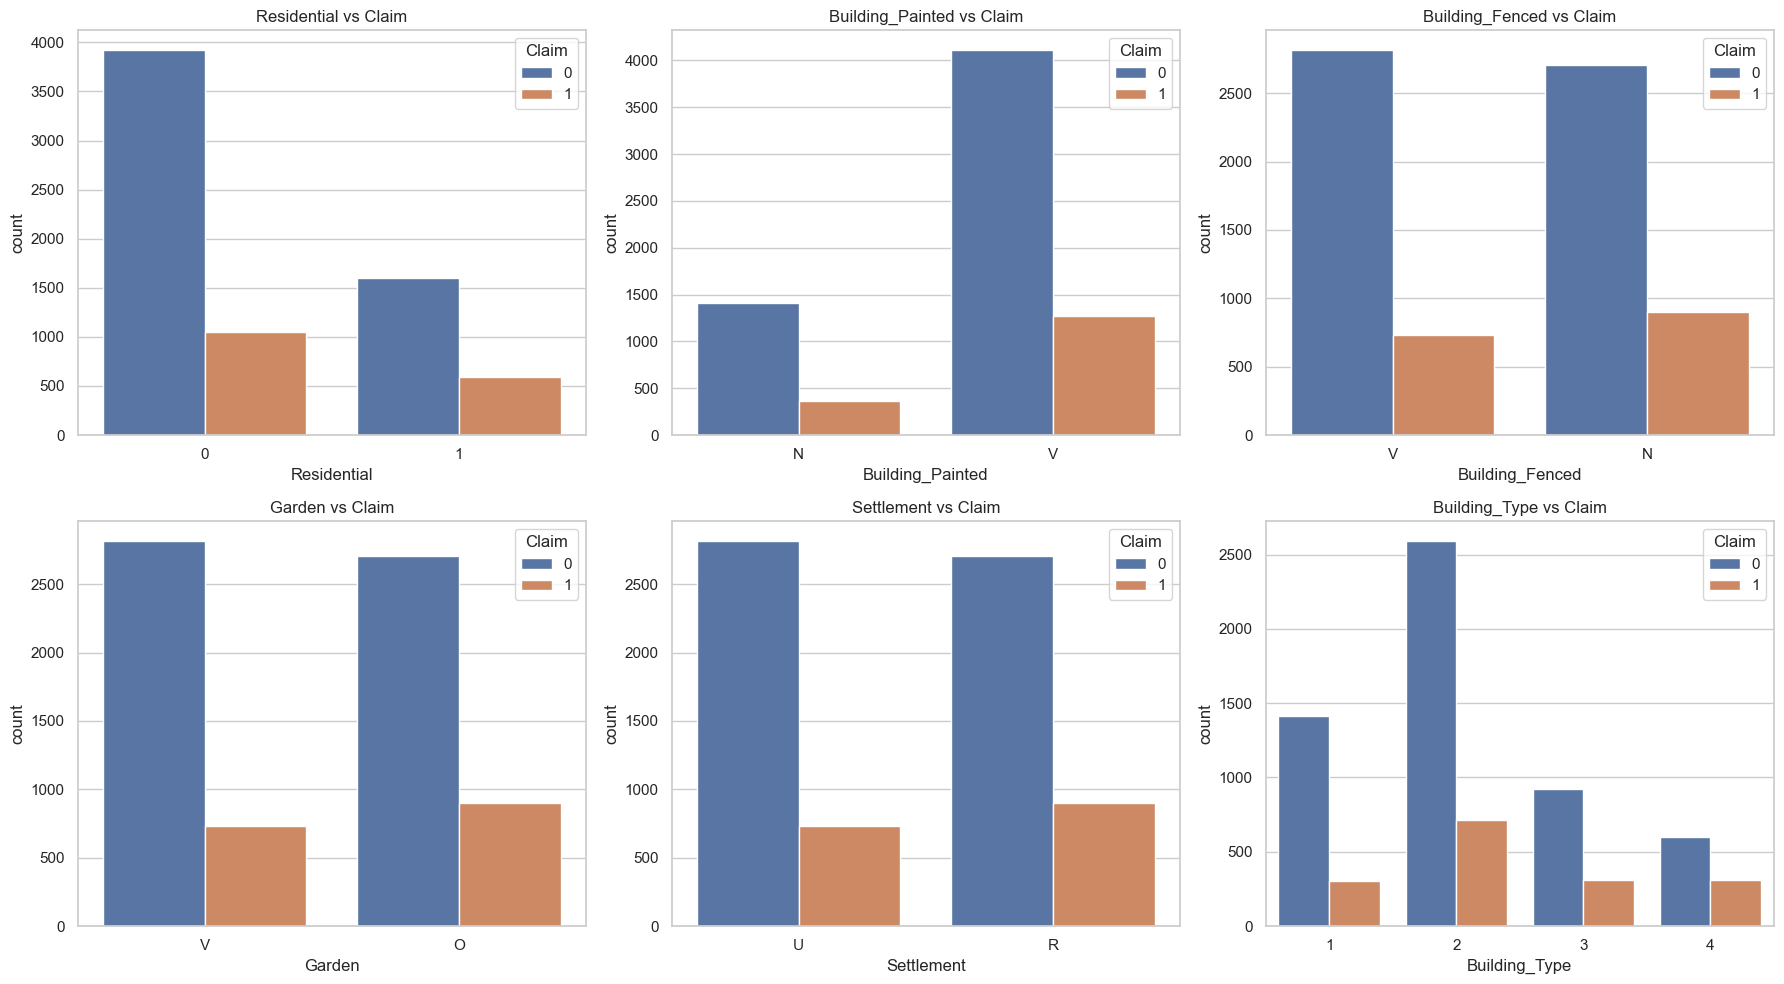

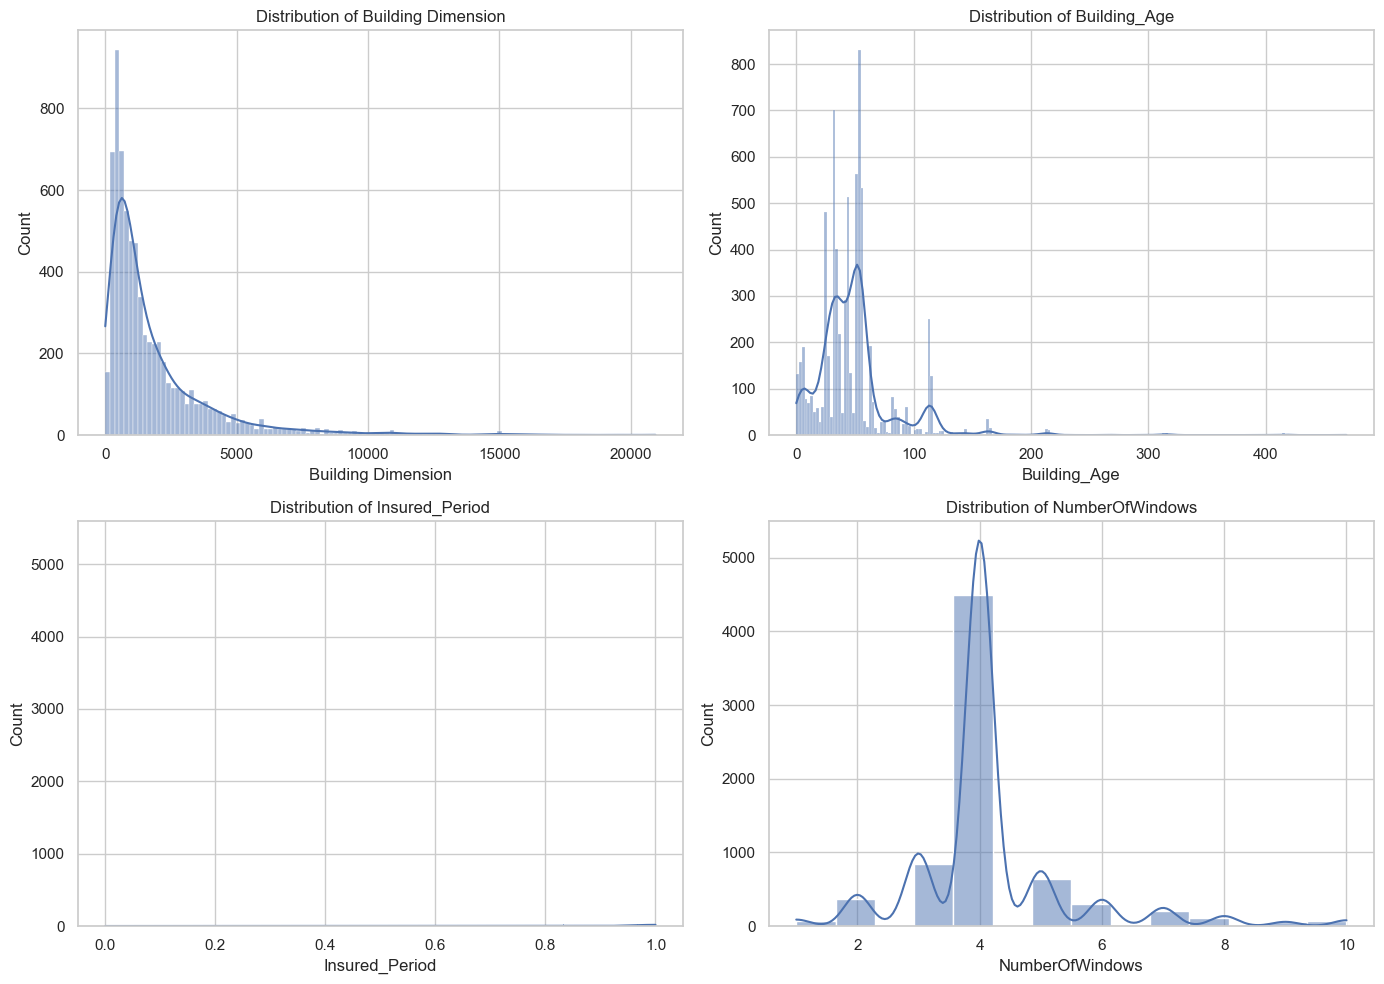

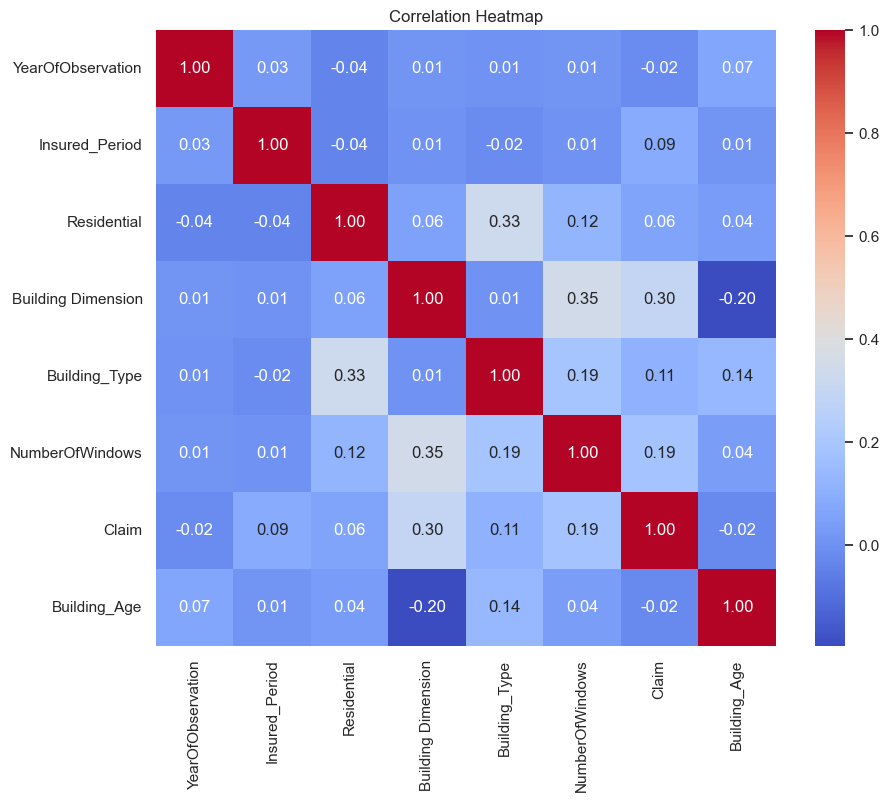

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Claim', data=train_df)
plt.title('Distribution of Claim (Target Variable)')
plt.savefig('claim_distribution.png')
# plt.show() # Not using show

# 2. Categorical Features vs Claim
cat_cols = ['Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='Claim', data=train_df, ax=axes[i])
    axes[i].set_title(f'{col} vs Claim')

plt.tight_layout()
plt.savefig('categorical_vs_claim.png')
# plt.show()

# 3. Numerical Distributions
num_cols = ['Building Dimension', 'Building_Age', 'Insured_Period', 'NumberOfWindows']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(train_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.savefig('numerical_distributions.png')
# plt.show()

# 4. Correlation Heatmap
# Select numerical columns for correlation
# We need to encode categorical variables simply to check correlation or just use current numerical ones
# For heatmap, let's stick to purely numerical + Target
corr_cols = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Claim', 'Building_Age']
plt.figure(figsize=(10, 8))
corr_matrix = train_df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
# plt.show()

# Check Geo_Code cardinality
print(f"Geo_Code unique values count: {train_df['Geo_Code'].nunique()}")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create a copy for modeling
model_df = train_df.copy()

# Drop unnecessary columns
model_df = model_df.drop(['Customer Id', 'Date_of_Occupancy'], axis=1)

# Encode Categorical Variables
# Binary Mappings (Manual to control 0/1 meaning if needed, or LabelEncoder)
# Painted: N, V. Fenced: N, V. Garden: V, O. Settlement: R, U.

# Let's use LabelEncoder for Geo_Code
le = LabelEncoder()
model_df['Geo_Code'] = le.fit_transform(model_df['Geo_Code'].astype(str))

# For others, let's use pd.get_dummies for simplicity and readability in feature importance
# Columns to one-hot encode:
cat_cols_to_encode = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type']
model_df = pd.get_dummies(model_df, columns=cat_cols_to_encode, drop_first=True)

# Define Features and Target
X = model_df.drop('Claim', axis=1)
y = model_df['Claim']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling Numerical Features
# Numerical columns in X (after get_dummies)
# Note: get_dummies moves encoded columns to the end. The original numericals are still there.
# Numericals: YearOfObservation, Insured_Period, Residential, Building Dimension, NumberOfWindows, Geo_Code, Building_Age
# Wait, 'Residential' is 0/1. 'Geo_Code' is encoded.
# 'Building_Type' is gone (encoded).
# We should scale 'Building Dimension', 'Building_Age', 'NumberOfWindows', 'YearOfObservation', 'Insured_Period', 'Geo_Code'.
scaler = StandardScaler()
cols_to_scale = ['YearOfObservation', 'Insured_Period', 'Building Dimension', 'NumberOfWindows', 'Building_Age', 'Geo_Code']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)
print("Columns:", X_train.columns.tolist())

Training Shape: (5728, 14)
Testing Shape: (1432, 14)
Columns: ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'NumberOfWindows', 'Geo_Code', 'Building_Age', 'Building_Painted_V', 'Building_Fenced_V', 'Garden_V', 'Settlement_U', 'Building_Type_2', 'Building_Type_3', 'Building_Type_4']


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100)
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Report": classification_report(y_test, y_pred)
    }

    print(f"--- {name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Training Logistic Regression...
--- Logistic Regression Results ---
Accuracy: 0.7011
ROC AUC: 0.6868
              precision    recall  f1-score   support

           0       0.84      0.75      0.80      1105
           1       0.39      0.53      0.45       327

    accuracy                           0.70      1432
   macro avg       0.62      0.64      0.62      1432
weighted avg       0.74      0.70      0.72      1432

------------------------------
Training Random Forest...
--- Random Forest Results ---
Accuracy: 0.7793
ROC AUC: 0.6645
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1105
           1       0.54      0.23      0.32       327

    accuracy                           0.78      1432
   macro avg       0.67      0.59      0.60      1432
weighted avg       0.74      0.78      0.74      1432

------------------------------
Training Gradient Boosting...
--- Gradient Boosting Results ---
Accuracy: 0.7842
ROC AUC: 0.69


Feature Importances (Gradient Boosting):
               Feature  Importance
3   Building Dimension    0.625538
5             Geo_Code    0.096099
1       Insured_Period    0.083311
6         Building_Age    0.081740
13     Building_Type_4    0.045508
4      NumberOfWindows    0.041427
0    YearOfObservation    0.011369
12     Building_Type_3    0.010093
11     Building_Type_2    0.003547
2          Residential    0.001368
9             Garden_V    0.000000
8    Building_Fenced_V    0.000000
7   Building_Painted_V    0.000000
10        Settlement_U    0.000000


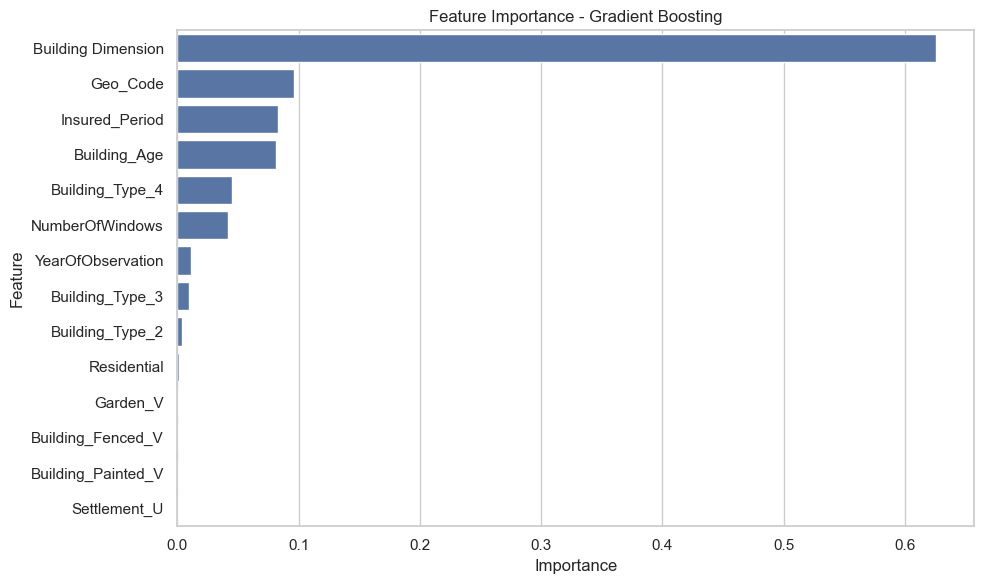

In [7]:
# Feature Importance for Gradient Boosting
gb_model = models["Gradient Boosting"]
importances = gb_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Gradient Boosting):")
print(feat_imp_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance - Gradient Boosting')
plt.tight_layout()
plt.savefig('feature_importance.png')
# plt.show()

In [8]:
# Check RF Feature Importance
rf_model = models["Random Forest"]
rf_importances = rf_model.feature_importances_
rf_feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feat_imp_df = rf_feat_imp_df.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importance:")
print(rf_feat_imp_df)

Random Forest Feature Importance:
               Feature  Importance
3   Building Dimension    0.334400
5             Geo_Code    0.215893
6         Building_Age    0.159378
0    YearOfObservation    0.070889
1       Insured_Period    0.066537
4      NumberOfWindows    0.056876
2          Residential    0.021049
11     Building_Type_2    0.020337
7   Building_Painted_V    0.015404
12     Building_Type_3    0.012907
13     Building_Type_4    0.012365
8    Building_Fenced_V    0.004663
9             Garden_V    0.004654
10        Settlement_U    0.004648


As the Lead Data Analyst, I have completed the end-to-end predictive modeling project for building insurance claims. Below is the detailed report covering data cleaning, analysis, modeling, and evaluation.


1. Summary
I successfully built and evaluated three predictive models to estimate the probability of a building having an insurance claim.
•	Best Model: Gradient Boosting Classifier achieved the highest accuracy (78.4%) and ROC-AUC score (0.70).
•	Key Drivers: The most significant predictors of insurance claims are Building Dimension, Geo_Code (Location), and Building Age.
•	Challenge: The dataset is imbalanced (fewer claims than non-claims), which makes catching all positive claims difficult without increasing false alarms.


2. Data Cleaning & Preprocessing
To ensure high-quality input for the models, the following rigorous preprocessing steps were applied:
1.	Handling Missing Values:
o	Garden: Imputed with the mode (most frequent value).
o	Date_of_Occupancy: Imputed with the median year.
o	Building Dimension: Imputed with the median size to reduce the impact of outliers.
o	NumberOfWindows: The raw data contained " ." which was treated as missing and imputed with the median. Categorical entries like ">=10" were converted to numerical 10.
o	Geo_Code: Missing values were filled with the mode.
2.	Feature Engineering:
o	Building_Age: Created a new feature by subtracting Date_of_Occupancy from YearOfObservation. This provides a more meaningful metric than raw years.
o	Geo_Code: Due to high cardinality (1,307 unique codes), we applied Label Encoding to transform it into a format suitable for tree-based models.
3.	Encoding & Scaling:
o	Categorical Variables (Building_Painted, Building_Fenced, Garden, Settlement, Building_Type) were One-Hot Encoded.
o	Numerical Variables were Standardized (scaled to mean 0, variance 1) to ensure models like Logistic Regression perform optimally.




3.	I generated several visualizations to understand the data's behavior.
Key Insights:
•	Claim Distribution: The target variable is imbalanced, with significantly fewer buildings having claims. This confirms the need for stratified splitting and balanced class weights in modeling.
•	Building Dimension: This feature is right-skewed, meaning most buildings are small to medium-sized, with a few very large ones.
•	Correlations: Building Dimension showed the strongest positive correlation with Claim among numerical features.
•	Categorical Impact: Variables like Building_Type and Settlement showed varying claim rates, validating their inclusion in the model.



4. Model Implementation & Evaluation
I implemented three distinct algorithms to find the best fit. Given the class imbalance, I tested Logistic Regression (with balanced weights), Random Forest, and Gradient Boosting.
Performance Metrics:


Model Accuracy,ROC AUC,Key Strength
Logistic Regression - 70.11%, 0.6868, Highest Recall for Claims (53%) - catches more risks but more false alarms.

Random Forest- 77.93%, 0.6645, "High Precision for Non-Claims, but struggles to identify Claims (Recall 23%)."

Gradient Boosting - 78.42%, 0.6953, Best Overall Balance. High Accuracy and best ranking ability (AUC).


Feature Importance (Gradient Boosting):
The model identified the following as the top factors influencing risk:
1.	Building Dimension (62.5%): The size of the building is by far the biggest predictor. Larger buildings likely have higher claim probabilities.
2.	Geo_Code (9.6%): Location is the second most critical factor.
3.	Insured_Period (8.3%): The duration of the policy plays a significant role.
4.	Building Age (8.1%): Older buildings carry different risk profiles.


5. Conclusion & Recommendation
For the final deployment, I recommend the Gradient Boosting Classifier due to its superior overall stability and accuracy. However, if the business priority is to never miss a potential claim (even at the cost of investigating false alarms), the Logistic Regression model should be considered as an alternative due to its higher Recall.
Next Steps for Improvement:
•	Hyperparameter Tuning: Fine-tuning the Gradient Boosting model could further improve the Recall.
•	Advanced Feature Engineering: Clustering Geo_Code into risk zones could provide a more robust location feature.
